In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [6]:
df=pd.read_csv('/Users/ambreservaege/Downloads/airline_passengers.csv', parse_dates=['Month'], index_col=['Month'])
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


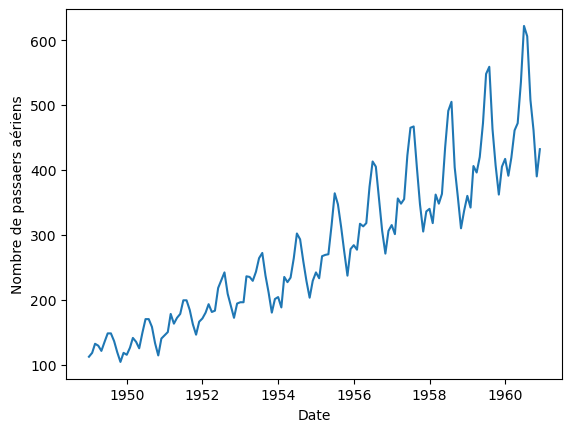

In [7]:
plt.xlabel('Date')
plt.ylabel('Nombre de passaers aériens')
plt.plot(df)

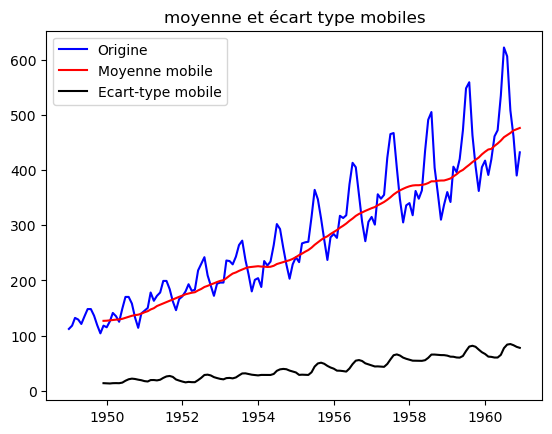

In [8]:
rolling_mean=df.rolling(window=12).mean()
rolling_std=df.rolling(window=12).std()

plt.plot(df, color='blue', label='Origine')
plt.plot(rolling_mean, color='red', label='Moyenne mobile')
plt.plot(rolling_std, color='black', label='Ecart-type mobile')
plt.legend(loc='best')
plt.title('moyenne et écart type mobiles')
plt.show()

In [10]:
result=adfuller(df['#Passengers'])

print('Statistiques ADF: ❴❵'.format(result[0]))
print('p-value: ❴❵'.format(result[1]))
print('Valeurs critiques:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF: ❴❵
p-value: ❴❵
Valeurs critiques:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


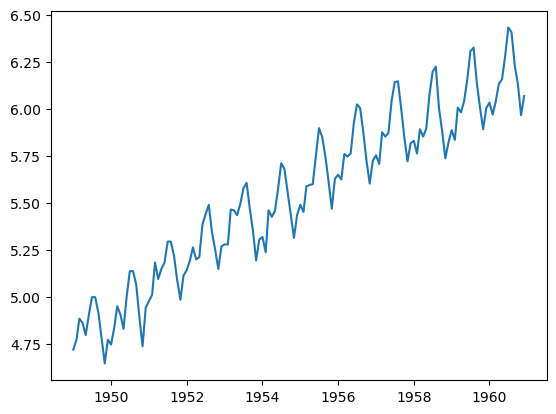

In [11]:
df_log=np.log(df)
plt.plot(df_log)

In [12]:
def test_stationarity(timeseries):

    #statistiques mobiles
    rolling_mean=timeseries.rolling(window=12).mean()
    rolling_std=timeseries.rolling(window=12).std()

    #tracé des stat mobiles
    original=plt.plot(timeseries, color='blue', label='Origine')
    mean=plt.plot(rolling_mean, color='red', label='Moyenne mobile')
    std=plt.plot(rolling_std, color='black', label='Ecart-type mobile')
    plt.legend(loc='best')
    plt.title('Moyenne et écart-type mobiles')
    plt.show(block=False)

    #test dickey-fuller : 
    result=adfuller(timeseries['#Passengers'])
    print('Statistiques ADF: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Valeurs critiques:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

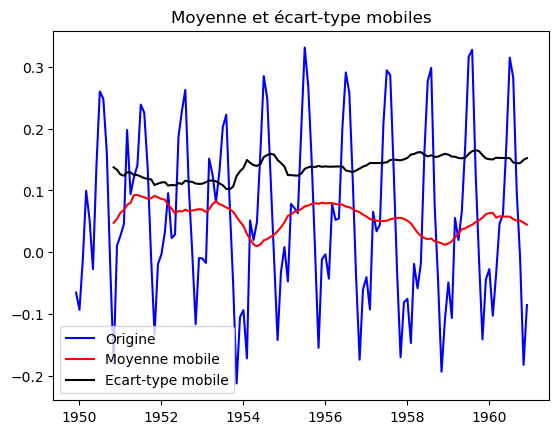

Statistiques ADF: -3.1629079913008824
p-value: 0.022234630001242303
Valeurs critiques:
	1%: -3.4865346059036564
	5%: -2.8861509858476264
	10%: -2.579896092790057


In [17]:
rolling_mean = df_log.rolling(window=12).mean()

df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
test_stationarity(df_log_minus_mean)

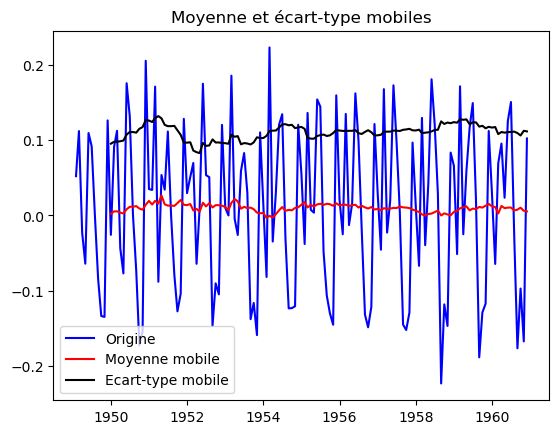

Statistiques ADF: -2.7171305983881355
p-value: 0.07112054815085828
Valeurs critiques:
	1%: -3.4825006939887997
	5%: -2.884397984161377
	10%: -2.578960197753906


In [18]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
test_stationarity(df_log_shift)

/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


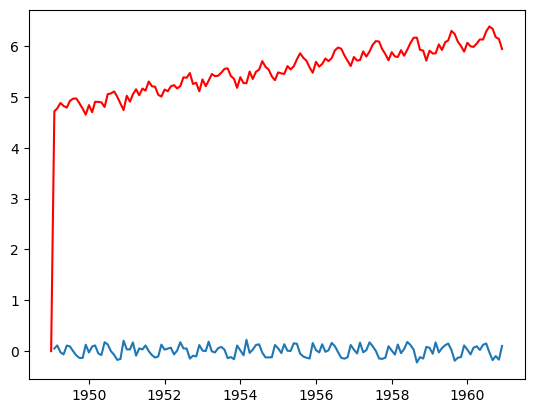

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

decomposition = seasonal_decompose(df_log)
model = ARIMA(df_log, order=(2,1,2))
results = model.fit()
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')